# Gerekli Kütüphaneler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn import datasets


seed = 42
np.random.seed(seed)

# Veri Seti

In [2]:
X, y = datasets.make_regression(
    n_samples=200,
    n_features=1,
    noise=15,
    random_state=seed
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

# Elastic Net

In [6]:
class ElasticNetRegression:
    def __init__(self, alpha=1.0, l1_ratio=0.5, lr=0.01, n_iters=1000):
        # Ceza terimi (L1 ve L2 Regularization)
        self.alpha = alpha
        # L1 ve L2'nin karisma orani
        self.l1_ratio = l1_ratio
        # Ogrenme orani (learning rate)
        self.lr = lr
        # Iterasyon sayisi
        self.n_iters = n_iters
        # Agirliklar
        self.W = None
        # Bias
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Agirliklar 0 ile doldurulur.
        self.W = np.zeros(n_features)
        # Bias 0 ile baslanir.
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.W) + self.b

            # L1 Penalty (Lasso)
            l1_penalty = self.l1_ratio * np.sign(self.W)
            # L2 Penalty (Ridge)
            l2_penalty = (1 - self.l1_ratio) * self.W
            
            # Gradyanlar hesaplanir.
            dW = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + self.alpha * (l1_penalty + l2_penalty)
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Agirlik ve bias guncellenir.
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.W) + self.b
        return y_pred

# Eğitim

In [7]:
elasticnet = ElasticNetRegression()
elasticnet.fit(X_train, y_train)

# Tahmin

In [8]:
y_pred = elasticnet.predict(X_test)

In [9]:
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: 0.8247484021099258


In [10]:
print("MSE Score:", mean_squared_error(y_test, y_pred))

MSE Score: 1080.2041143078175


# Sonuçlar

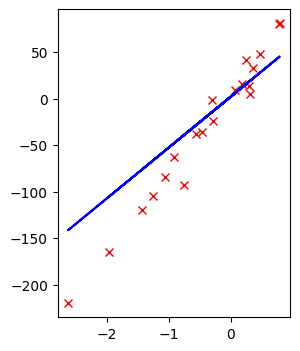

In [11]:
plt.figure(figsize=(3, 4))
plt.plot(X_test, y_test, "rx")
plt.plot(X_test, y_pred, "b")
plt.show()

# Scikit-Learn

In [12]:
elasticnet_2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_2.fit(X_train, y_train)

ElasticNet()

In [13]:
y_pred_2 = elasticnet_2.predict(X_test)

In [14]:
print("R^2 Score:", r2_score(y_test, y_pred_2))

R^2 Score: 0.8247487490337078


In [15]:
print("MSE Score:", mean_squared_error(y_test, y_pred_2))

MSE Score: 1080.2019759621412
